In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import os


pathCropped = "C:/Users/schof/LeedsUni/personalproject/CroppedDefects/"
pathCroppedMask = "C:/Users/schof/LeedsUni/personalproject/CroppedMasks/"
pathDefectTile = "C:/Users/schof/LeedsUni/personalproject/DefectTiles/"
pathDefectTileStrict = "C:/Users/schof/LeedsUni/personalproject/tiles/defect/"
pathNameNoDefectCropped = "C:/Users/schof/LeedsUni/personalproject/NODefect_images_cropped/"
pathGoodTile = "C:/Users/schof/LeedsUni/personalproject/tiles/normal/"

trainDefect = "C:/Users/schof/LeedsUni/personalproject/training_data/defect/"
trainNormal = "C:/Users/schof/LeedsUni/personalproject/training_data/normal/"

valDefect = "C:/Users/schof/LeedsUni/personalproject/validation_data/defect/"
valNormal = "C:/Users/schof/LeedsUni/personalproject/validation_data/normal/"

testDefect = "C:/Users/schof/LeedsUni/personalproject/test_data/defect/"
testNormal = "C:/Users/schof/LeedsUni/personalproject/test_data/normal/"

suff = "_mask"

In [2]:
class Tile:   
    x = 0
    y = 0
    width = 0
    height = 0
    imagex = 0
    imagey = 0
    roi = 0

    def __init__(self,x, y, overlap, width, height, imagex, imagey):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
#         self.imagex = x * (width - overlap)
#         self.imagey = y * (height - overlap)
        self.imagex = imagex
        self.imagey = imagey

    def populate(self,master):
        y = self.imagey
        x = self.imagex
        height = self.height
        width = self.width
        #print(y,x)
        self.roi = master[y:y+height, x:x+width]
        if (self.roi.shape[1] < width):
            #print("error", self.roi.shape, x)
            new_x = x - (width-self.roi.shape[1])
            self.roi = master[y:y+height, new_x:new_x+width]
            self.imagex = new_x


        if (self.roi.shape[0] <height):
            #print("error", self.roi.shape)
            new_y = y - (height-self.roi.shape[0])
            self.roi = master[new_y:new_y+height, x:x+width]
            self.imagey = new_y
        

In [3]:
def tileImage(image,width, height, overlap):
    t_width = width
    t_height = height
    overlap = overlap

    # get dimensions of image
    dimensions = image.shape
 
    # height, width, number of channels in image
    height = image.shape[0]
    width = image.shape[1]
    channels = image.shape[2]

    tilesInX = math.ceil(width / (t_width - overlap))
    tilesInY = math.ceil(height / (t_height - overlap))
    
    tiles = []

    
    for y in range(tilesInY):
        row = []
        for x in range(tilesInX):
            tempx =  x * (t_width - overlap)
            tempy = y * (t_height - overlap)
            
            if(y == tilesInY - 1):
                tempy = height - t_height
                
            if(x == tilesInX-1):
                tempx = width - t_width

                

            
            tile = Tile(x,y,overlap,t_width,t_height, tempx, tempy)
            tile.populate(image)
            row.append(tile)
        tiles.append(row)
        
    return tiles
        

In [4]:
def maskInspect(img, cutoff):
    defect = np.where(img != [0])
    if defect[0].size > cutoff:
        return True
    return False

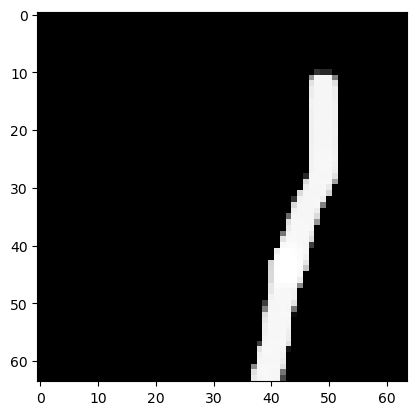

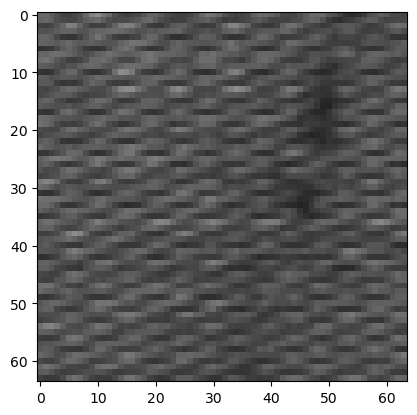

-------------------------------------------------------------------------------------


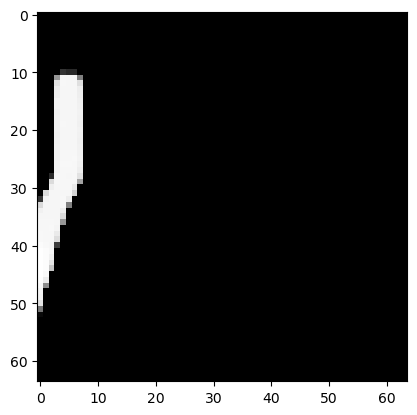

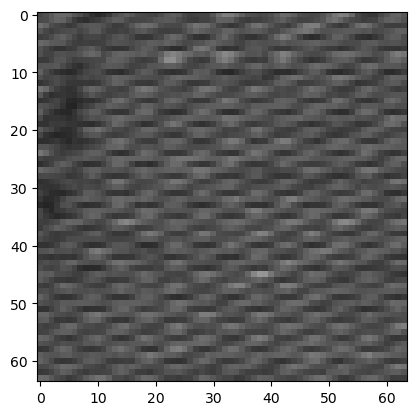

-------------------------------------------------------------------------------------


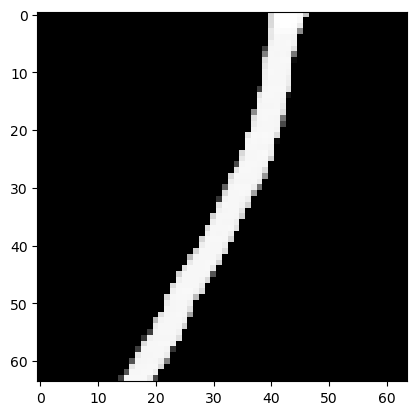

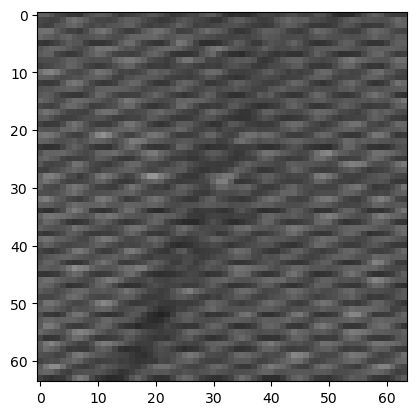

-------------------------------------------------------------------------------------


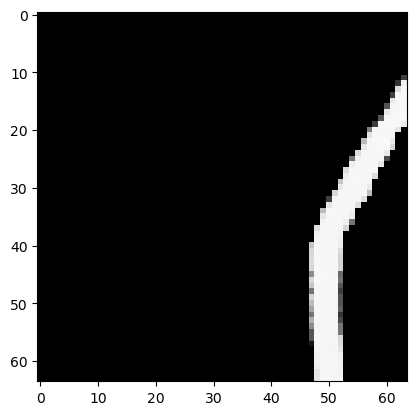

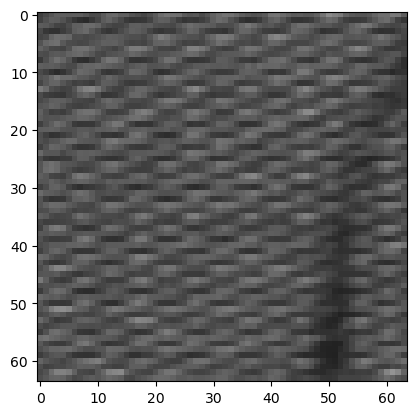

-------------------------------------------------------------------------------------


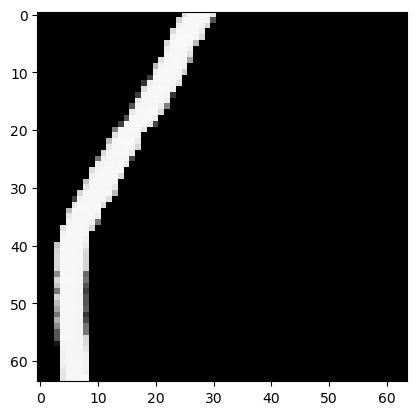

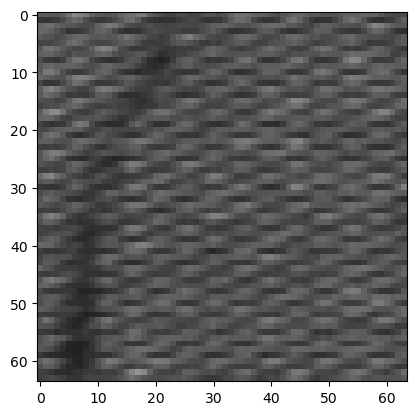

-------------------------------------------------------------------------------------


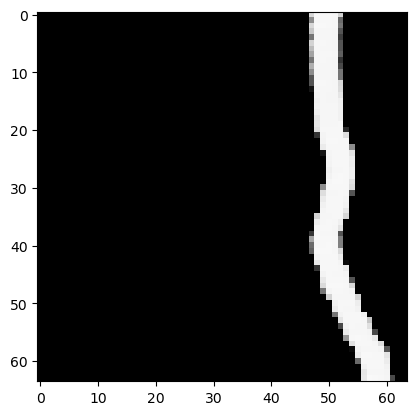

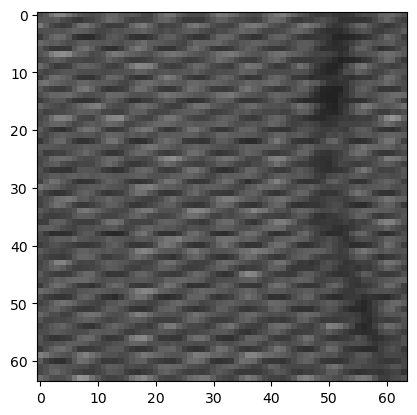

-------------------------------------------------------------------------------------


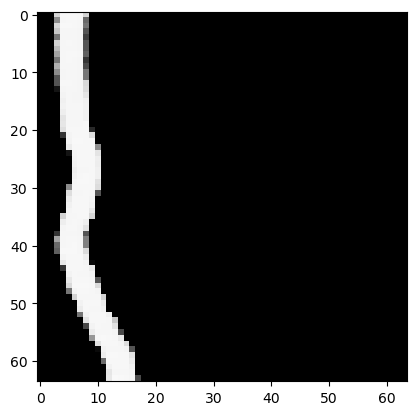

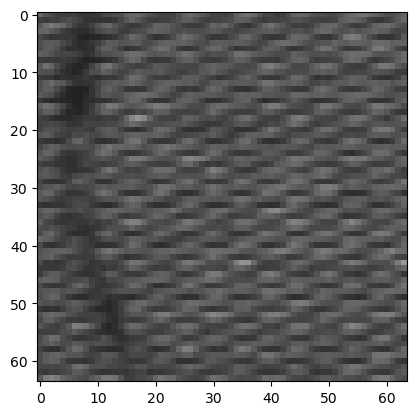

-------------------------------------------------------------------------------------


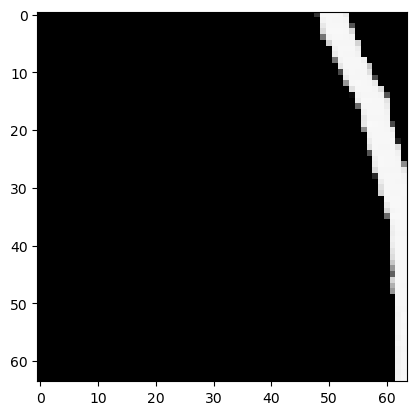

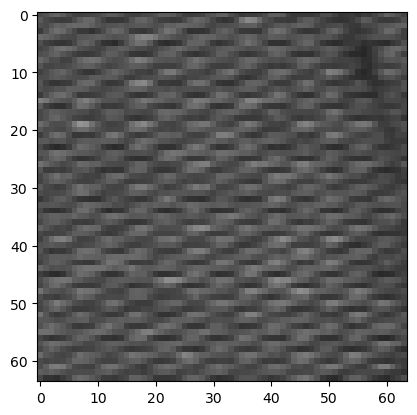

-------------------------------------------------------------------------------------


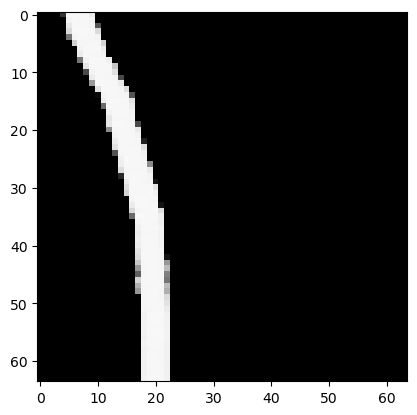

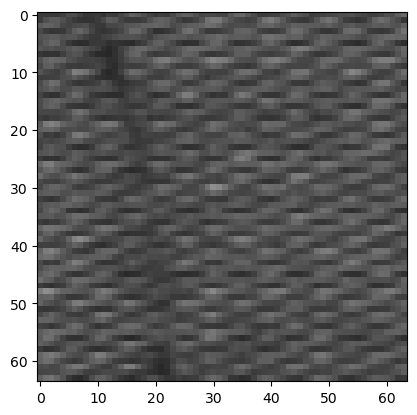

-------------------------------------------------------------------------------------


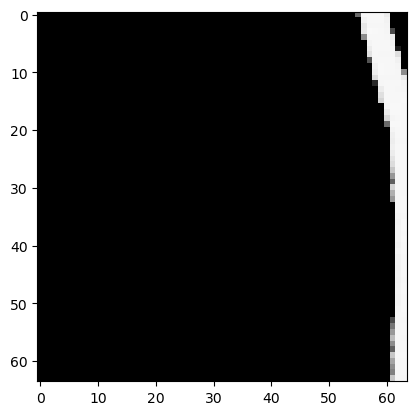

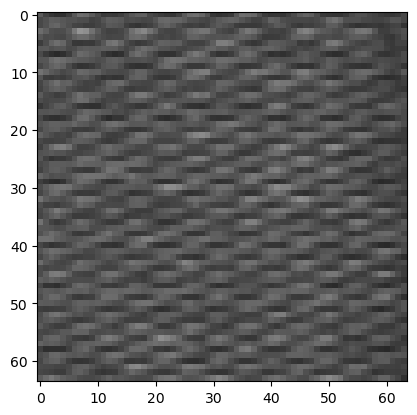

-------------------------------------------------------------------------------------


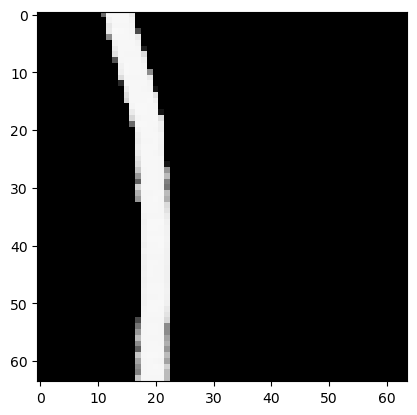

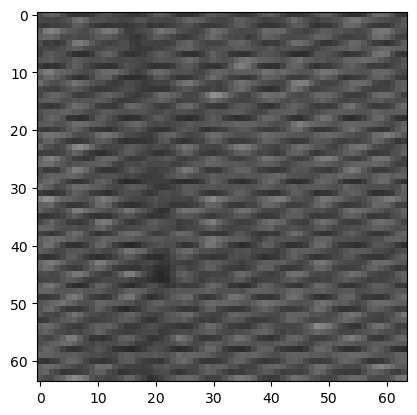

-------------------------------------------------------------------------------------


In [5]:
arr = os.listdir(pathCropped)

name = arr[0]
image = cv2.imread(pathCropped+name)
mask = cv2.imread(pathCroppedMask+name[:-4]+suff+".png")
tiles = tileImage(image,64,64,20)
maskTiles = tileImage(mask,64,64,20)

for row in maskTiles:
    for tile in row:
        if maskInspect(tile.roi, 100) == True:
            plt.imshow(tile.roi)
            plt.show()
            plt.imshow(tiles[tile.y][tile.x].roi)
            plt.show()
            print("-------------------------------------------------------------------------------------")


In [6]:
arr = os.listdir(pathCropped)
for name in arr:
    t_Num = 0
    img = cv2.imread(pathCropped+name)
    mask = cv2.imread(pathCroppedMask+name[:-4]+suff+".png")  
    tiles = tileImage(img,64,64,20)
    maskTiles = tileImage(mask,64,64,20)
    
    for row in maskTiles:
        for tile in row:
            if maskInspect(tile.roi, 100) == True:
                cv2.imwrite(pathDefectTile+name[:-4]+"_"+str(t_Num)+".png", tiles[tile.y][tile.x].roi)
            else:
                cv2.imwrite(pathGoodTile+name[:-4]+"_"+str(t_Num)+".png", tiles[tile.y][tile.x].roi)
        
            t_Num = t_Num + 1

Now i can tile the cropped images with no defects and add these to the known good tiles.

In [7]:
arr = os.listdir(pathNameNoDefectCropped)
for name in arr:
    t_Num = 0
    img = cv2.imread(pathNameNoDefectCropped+name)
    tiles = tileImage(img,64,64,20)

    for row in tiles:
        for tile in row:
            cv2.imwrite(pathGoodTile+name[:-4]+"_"+str(t_Num)+".png", tiles[tile.y][tile.x].roi)
            t_Num = t_Num + 1
        

Defect Tiles that are more sctrict

In [8]:
arr = os.listdir(pathCropped)

for name in arr:
    t_Num = 0
    img = cv2.imread(pathCropped+name)
    mask = cv2.imread(pathCroppedMask+name[:-4]+suff+".png")  
    tiles = tileImage(img,64,64,20)
    maskTiles = tileImage(mask,64,64,20)
    
    for row in maskTiles:
        for tile in row:
            if maskInspect(tile.roi, 500) == True:
                cv2.imwrite(pathDefectTileStrict+name[:-4]+"_"+str(t_Num)+".png", tiles[tile.y][tile.x].roi)        
            t_Num = t_Num + 1

In [9]:
arrGood = os.listdir(pathGoodTile)
print("good tiles:", len(arrGood))
arrDefect = os.listdir(pathDefectTile)
print("defect tiles:", len(arrDefect))
arrDefectStrict = os.listdir(pathDefectTileStrict)
print("defect tiles:", len(arrDefectStrict))

print("more good tiles by factor of", len(arrGood) / len(arrDefect) , ", not optimum")

good tiles: 113307
defect tiles: 1365
defect tiles: 909
more good tiles by factor of 83.00879120879121 , not optimum


In [10]:
# now i Read in the tiles and seperate them into a training, validation and test set.

In [11]:
goodNamesAll = os.listdir(pathGoodTile)
goodNames = []

# only importing a fraction of good tiles to not add bias to system
indexes = np.random.randint(0, len(goodNamesAll)-1, size=5000)
# indexes = np.random.randint(0, len(goodNamesAll)-1, size=1000)



for i in indexes:
    goodNames.append(goodNamesAll[i])
    
normal_features = []
for name in goodNames:
    img = cv2.imread(pathGoodTile+name)
    normal_features.append(img)
    
defectNames = os.listdir(pathDefectTileStrict)
defect_features = []

for name in defectNames:
    img = cv2.imread(pathDefectTileStrict+name)
    defect_features.append(img)


print(len(defect_features))

909


In [12]:
# split into test and (training, val)
train_val_defect_features = []
train_val_normal_features = []

test_defect_features = []
test_normal_features = []

    
test_size = int(0.1*len(normal_features)) # 10%
indexesNormal = np.random.randint(0, len(normal_features), size=test_size)
test_size = int(0.1*len(defect_features)) # 10%
indexesDefect = np.random.randint(0, len(defect_features), size=test_size)

for i in range(0, len(normal_features)):
    if i in indexesNormal:
        test_normal_features.append(normal_features[i])
    else:
        train_val_normal_features.append(normal_features[i])

for i in range(0, len(defect_features)):
    if i in indexesDefect:
        test_defect_features.append(defect_features[i])
    else:
        train_val_defect_features.append(defect_features[i])
        
print(len(train_val_normal_features))
print(len(train_val_defect_features))

902
821


In [13]:
# split into training and val

train_defect_features = []
train_normal_features = []

val_defect_features = []
val_normal_features = []

    
val_size = int(0.2*len(train_val_normal_features)) # 10%
indexesNormal = np.random.randint(0, len(train_val_normal_features), size=val_size)
val_size = int(0.2*len(train_val_defect_features)) # 10%
indexesDefect = np.random.randint(0, len(train_val_defect_features), size=val_size)


for i in range(0, len(train_val_normal_features)):
    if i in indexesNormal:
        val_normal_features.append(train_val_normal_features[i])
    else:
        train_normal_features.append(train_val_normal_features[i])

for i in range(0, len(train_val_defect_features)):
    if i in indexesDefect:
        val_defect_features.append(train_val_defect_features[i])
    else:
        train_defect_features.append(train_val_defect_features[i])
        


In [14]:
print("train normal:",len(train_normal_features))
print("train defcet:",len(train_defect_features))
print("val normal:",len(val_normal_features))
print("val defect:",len(val_defect_features))
print("test normal:",len(test_normal_features))
print("test defect:",len(test_defect_features))

train normal: 737
train defcet: 672
val normal: 165
val defect: 149
test normal: 98
test defect: 88


In [15]:
# saveing train
tileCounter = 0

for tile in train_normal_features:
    cv2.imwrite(trainNormal+"normal_"+str(tileCounter)+".png",tile)
    tileCounter = tileCounter + 1
    
tileCounter = 0

for tile in train_defect_features:
    cv2.imwrite(trainDefect+"defect_"+str(tileCounter)+".png",tile)
    tileCounter = tileCounter + 1


In [16]:
# saveing val

tileCounter = 0

for tile in val_normal_features:
    cv2.imwrite(valNormal+"normal_"+str(tileCounter)+".png",tile)
    tileCounter = tileCounter + 1
    
tileCounter = 0

for tile in val_defect_features:
    cv2.imwrite(valDefect+"defect_"+str(tileCounter)+".png",tile)
    tileCounter = tileCounter + 1


In [17]:
# saveing test

tileCounter = 0

for tile in test_normal_features:
    cv2.imwrite(testNormal+"normal_"+str(tileCounter)+".png",tile)
    tileCounter = tileCounter + 1
    
tileCounter = 0

for tile in test_defect_features:
    cv2.imwrite(testDefect+"defect_"+str(tileCounter)+".png",tile)
    tileCounter = tileCounter + 1


In [18]:
defectTrainFiles = os.listdir(trainDefect)
print("defects in train set:", len(defectTrainFiles))
normalTrainFiles = os.listdir(trainNormal)
print("normal in train set:", len(normalTrainFiles))

defectValFiles = os.listdir(valDefect)
print("defects in val set:", len(defectValFiles))
normalValFiles = os.listdir(valNormal)
print("normal in val set:", len(normalValFiles))

defectTestFiles = os.listdir(testDefect)
print("defects in test set:", len(defectTestFiles))
normalTestFiles = os.listdir(testNormal)
print("normal in test set:", len(normalTestFiles))

defects in train set: 1345
normal in train set: 3719
defects in val set: 151
normal in val set: 816
defects in test set: 88
normal in test set: 476
